In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
from src.data.load_data import load_bank_data
from src.data.preprocess import split_data

# Load dataset
df = load_bank_data("../data/raw/bank-full.csv")

# Split (must be same random_state inside split_data)
X_train, X_test, y_train, y_test = split_data(df)

print("Test size:", X_test.shape)

Test size: (9043, 15)


In [3]:
import joblib

def load_model_and_threshold(name):
    model_path = PROJECT_ROOT / f"models/{name}_model.pkl"
    threshold_path = PROJECT_ROOT / f"models/{name}_threshold.txt"

    model = joblib.load(model_path)

    with open(threshold_path) as f:
        threshold = float(f.read().strip())

    return model, threshold

In [4]:
#Evaluation
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
)

import pandas as pd


def evaluate_saved_model(model, threshold, X_test, y_test):

    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs >= threshold).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "AUC": roc_auc_score(y_test, probs),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1": f1_score(y_test, preds),
        "MCC": matthews_corrcoef(y_test, preds),
    }


In [5]:
model_names = [
    "logistic",
    "decision_tree",
    "knn",
    "naive_bayes",
    "random_forest",
    "xgboost",
]

results = []

for name in model_names:
    model, threshold = load_model_and_threshold(name)

    metrics = evaluate_saved_model(
        model,
        threshold,
        X_test,
        y_test,
    )

    metrics["Model"] = name
    results.append(metrics)

df_results = pd.DataFrame(results)

df_results = df_results[
    ["Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"]
]

df_results.sort_values(by="F1", ascending=False)


/Users/aniketwarnoolkar/Workspace/MTech/Machine_Learning/MachineLearning_Classification/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aniketwarnoolkar/Workspace/MTech/Machine_Learning/MachineLearning_Classification/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aniketwarnoolkar/Workspace/MTech/Machine_Learning/MachineLearning_Classification/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
5,xgboost,0.873604,0.797107,0.464847,0.531191,0.495809,0.425154
4,random_forest,0.872056,0.798901,0.458989,0.523629,0.489183,0.417595
1,decision_tree,0.871503,0.759869,0.456155,0.511342,0.482175,0.409967
0,logistic,0.875926,0.777541,0.467871,0.440454,0.453749,0.384058
3,naive_bayes,0.859449,0.757271,0.407149,0.441399,0.423583,0.344062
2,knn,0.847617,0.703085,0.361352,0.394140,0.377034,0.290767


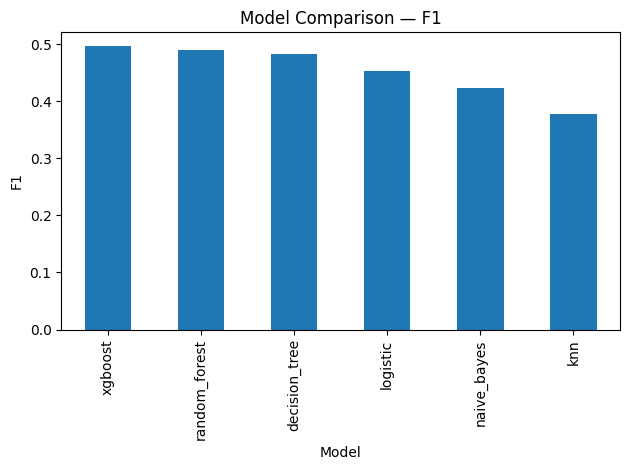

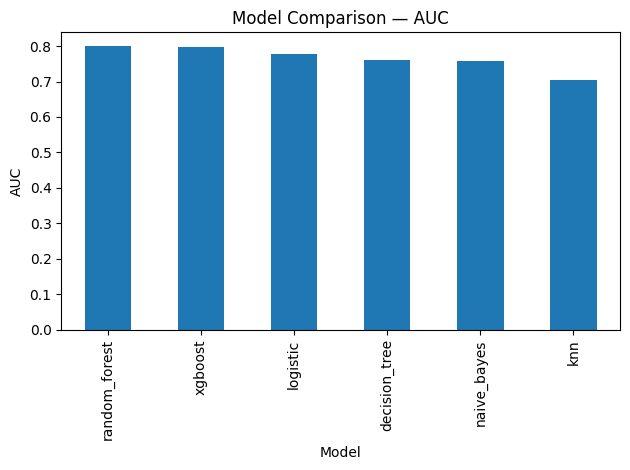

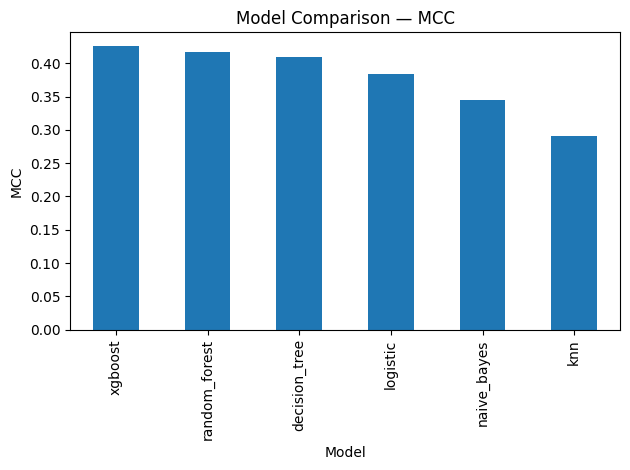

In [6]:
import matplotlib.pyplot as plt

metrics_to_plot = ["F1", "AUC", "MCC"]

for metric in metrics_to_plot:
    df_results.sort_values(metric, ascending=False).plot(
        x="Model",
        y=metric,
        kind="bar",
        legend=False,
    )
    plt.title(f"Model Comparison — {metric}")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

In [7]:
#Save and create test.csv

from pathlib import Path
from src.data.load_data import load_bank_data
from src.data.preprocess import split_data

# Load full dataset
df = load_bank_data("../data/raw/bank-full.csv")

# Split
X_train, X_test, y_train, y_test = split_data(df)

# Combine test X + y
test_df = X_test.copy()
test_df["y"] = y_test

# Save
out_path = Path("../data/test")
out_path.mkdir(parents=True, exist_ok=True)

test_df.to_csv(out_path / "bank_test.csv", index=False)

print("Saved test set to:", out_path / "bank_test.csv")
print("Shape:", test_df.shape)


Saved test set to: ../data/test/bank_test.csv
Shape: (9043, 16)
